In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("Salary_Prediction_cleaned.csv")
df.head()

,Unnamed: 0,job title,job description,rating,company name,headquarters,size,founded,ownership,sector,...,headquarters same city,python involved,aws involved,excel involved,tableau involved,powerBI involved,description length,seniority,job simplification,no of competitors
0,0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,Montreal,501 to 1000 employees,2007,Company - Private,Travel & Tourism,...,no,no,no,no,yes,yes,3417,senior,data scientist,No data
1,1,Data Scientist,"At Noom, we use scientifically proven methods ...",4.5,Noom US,New York,1001 to 5000 employees,2008,Company - Private,Consumer Services,...,yes,yes,no,yes,no,no,2350,none,data scientist,No data
2,2,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,Lyndhurst,201 to 500 employees,2019,Company - Private,Information Technology,...,yes,yes,no,yes,yes,yes,2619,none,none,2
3,3,Director,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,New York,51 to 200 employees,2007,Company - Private,Business Services,...,yes,yes,no,yes,no,no,2755,none,director,3
4,4,Data Scientist,Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies,Hartford,201 to 500 employees,1985,Company - Private,Insurance,...,no,yes,no,no,no,no,2692,none,data scientist,3


In [23]:
df.columns

Index(['Unnamed: 0', 'job title', 'job description', 'rating', 'company name',
       'headquarters', 'size', 'founded', 'ownership', 'sector', 'revenue',
       'easy apply', 'city', 'state', 'min salary', 'max salary', 'avg salary',
       'age', 'headquarters same city', 'python involved', 'aws involved',
       'excel involved', 'tableau involved', 'powerBI involved',
       'description length', 'seniority', 'job simplification',
       'no of competitors'],
      dtype='object')

In [24]:
df_model = df[['avg salary','rating','headquarters same city','size','ownership','sector','revenue','easy apply','city','state','age',
                'python involved','aws involved','excel involved','tableau involved','powerBI involved','description length','seniority',
                'job simplification','no of competitors']]

### DATA MODELING
1) Get dummy data - basically like one hot encoding
2) Train Test Split
3) Multiple Linear Regression
4) Lasso Regression
5) Random Forest
6) Tune models GridsearchCV
7) Test Ensembles

## 1

In [25]:
df_dum = pd.get_dummies(df_model)
print("No of rows = "+str(df_dum.shape[0]))
print("No of attributes = ",str(df_dum.shape[1]))
df_dum

No of rows = 2892
No of attributes =  258


,avg salary,rating,easy apply,age,description length,headquarters same city_no,headquarters same city_yes,size_1 to 50 employees,size_10000+ employees,size_1001 to 5000 employees,...,job simplification_data engineer,job simplification_data scientist,job simplification_director,job simplification_machine learning,job simplification_manager,job simplification_none,no of competitors_1,no of competitors_2,no of competitors_3,no of competitors_No data
0,146.0,3.5,False,15,3417,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,146.0,4.5,False,14,2350,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,146.0,3.4,False,3,2619,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,146.0,3.4,False,15,2755,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,146.0,2.9,False,37,2692,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,83.5,4.2,False,15,1127,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2888,83.5,3.9,False,12,3523,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2889,83.5,4.4,False,11,2054,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2890,83.5,5.0,False,14,1479,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


## 2

In [26]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg salary',axis=1)
y = df_dum['avg salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3

### R Squared
1) 0.7 - 1 then the portfolio has the highest relationship
2) 0.4 - 0.7 then the relationship between the attributes and values is average
3) 0.01 - 0.4 then there is very little or no connection between the the attributes and values

Our R sqaured value is 0.45 => It explains about 45% oof the variation in the data

In [27]:
import statsmodels.api as sm
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm.astype(float))
#model.fit().summary()

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
lr.fit(X_train,y_train)
np.mean(cross_val_score(lr,X_train,y_train,scoring='neg_mean_absolute_error',cv=2))

-26.7961145163367

## Lasso Regression

In [29]:
from sklearn.linear_model import Lasso

lrl = Lasso()
#Default value of alpha in lasso regression is 1

np.mean(cross_val_score(lrl,X_train,y_train,scoring='neg_mean_absolute_error',cv=2))

-26.759050835852594

There is improvement in the MAE, but very small. So we need to find an ideal value for Alpha

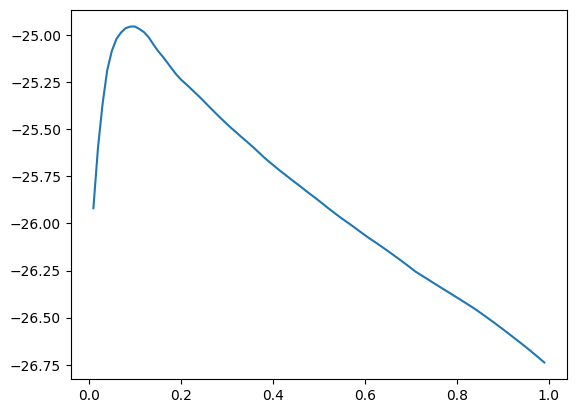

In [30]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lrl = Lasso(alpha=i/100)
    error.append(np.mean(cross_val_score(lrl,X_train,y_train,scoring='neg_mean_absolute_error',cv=2)))

plt.plot(alpha,error)

In [31]:
print("Max Alpha value = ",alpha[np.argmax(error)])
print("Max Negative MAE value = ",error[np.argmax(error)])

Max Alpha value =  0.1
Max Negative MAE value =  -24.95499918100542


In [32]:
lrl = Lasso(alpha=0.1)
lrl.fit(X_train,y_train)
np.mean(cross_val_score(lrl,X_train,y_train,scoring='neg_mean_absolute_error',cv=2))

-24.95499918100542

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
np.mean(cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error',cv=2))

-25.874481140521375

#### So Lasso Regression is the best Model

### Tuning Random Forest Model - using GridsearchCV

In [34]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,100,10),'criterion':['absolute_error'],'max_features':['auto']}
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=2)
gs.fit(X_train,y_train)

c:\Users\ragha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\ragha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\ragha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `ma

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['absolute_error'],
                         'max_features': ['auto'],
                         'n_estimators': range(10, 100, 10)},
             scoring='neg_mean_absolute_error')

In [35]:
print(gs.best_score_)

-25.489281612940907


From -25.8 it became -25.5, Still Lasso regression is better

### Testing

In [36]:
pred_lr = lr.predict(X_test)
pred_lrl = lrl.predict(X_test)
pred_rf = rf.predict(X_test)
pred_gs = gs.best_estimator_.predict(X_test)

In [37]:
from sklearn.metrics import mean_absolute_error
print("Multi-linear regression : ",mean_absolute_error(y_test,pred_lr))
print("Lasso regression : ",mean_absolute_error(y_test,pred_lrl))
print("Random Forest : ",mean_absolute_error(y_test,pred_rf))
print("Tuned Random Forest : ",mean_absolute_error(y_test,pred_gs))

Multi-linear regression :  25.99029676831861
Lasso regression :  25.21168879819956
Random Forest :  25.925186199522987
Tuned Random Forest :  26.034801381692574


### Ensemble Learning - Combining Models

In [38]:
print("Lasso and Tuned Random Forest : ",mean_absolute_error(y_test,(pred_lrl+pred_gs)/2))
print("Lasso and Tuned Random Forest : ",mean_absolute_error(y_test,((9/10)*pred_lrl+(1/10)*pred_gs)))

Lasso and Tuned Random Forest :  25.210063434610237
Lasso and Tuned Random Forest :  25.12277975381133


Checking which ration of each model is better


In [39]:
for i in range(1,10):
    print("i = ",i)
    print("Lasso and Tuned Random Forest : ",mean_absolute_error(y_test,((i/10)*pred_lrl+((10-i)/10)*pred_gs)))

i =  1
Lasso and Tuned Random Forest :  25.810586543218044
i =  2
Lasso and Tuned Random Forest :  25.619422128710763
i =  3
Lasso and Tuned Random Forest :  25.44404755018277
i =  4
Lasso and Tuned Random Forest :  25.310319680636535
i =  5
Lasso and Tuned Random Forest :  25.210063434610237
i =  6
Lasso and Tuned Random Forest :  25.137945560051374
i =  7
Lasso and Tuned Random Forest :  25.094503755536063
i =  8
Lasso and Tuned Random Forest :  25.08348011584391
i =  9
Lasso and Tuned Random Forest :  25.12277975381133


i = 8 gave the best result so

In [40]:
final_mod = (8/10)*pred_lrl+((2)/10)*pred_gs
print("80 percent Lasso and 20 percent Tuned Random Forest : ", mean_absolute_error(y_test,final_mod))

80 percent Lasso and 20 percent Tuned Random Forest :  25.08348011584391


### Pickle the model
it is used to make the models usable by other programs. Everytime we open the IDE it is not feasable to retrain the model again and again.

Pickle in Python is primarily used in serializing and deserializing a Python object structure. In other words, it's the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.

In [41]:
import pickle
pickl = {'model_lrl':lrl} 
pickle.dump(pickl, open("model_lrl_file.p","wb"))

pickl = {'model_gs':gs.best_estimator_} 
pickle.dump(pickl, open("model_gs_file.p","wb"))

Move these files to the models folder in FlaskAPI folder


Retrieving the trained model

In [42]:
import pickle

file_name = r"C:\Users\ragha\Desktop\VIT\Projects\SalaryPrediction\FlaskAPI\models\model_lrl_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model_lrl = data['model_lrl']

file_name = r"C:\Users\ragha\Desktop\VIT\Projects\SalaryPrediction\FlaskAPI\models\model_gs_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model_gs = data['model_gs']

predict_lrl = model_lrl.predict(X_test)
predict_gs = model_gs.predict(X_test)

Checking if that is the trained model

In [43]:
print("80 percent Lasso and 20 percent Tuned Random Forest : ", mean_absolute_error(y_test,(8/10)*predict_lrl+(2/10)*predict_gs))

80 percent Lasso and 20 percent Tuned Random Forest :  25.08348011584391


Prediction for the first column

In [46]:
((2/10)*model_gs.predict(X_test.iloc[1,:].values.reshape(1,-1)))+((8/10)*model_lrl.predict(X_test.iloc[1,:].values.reshape(1,-1)))

c:\Users\ragha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\ragha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([139.61188736])

In [53]:
list(X_test.iloc[1,:])

[3.6,
 False,
 15,
 7224,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0